In [1]:
from ndl.nn import NeuralNetwork
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [2]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("Loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("Samples: {}, features: {}".format(*data.shape))

Loading MNIST (sample) dataset...
Samples: 1797, features: 64


In [3]:
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data, digits.target, test_size=0.25)

In [4]:
# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

print(testY[0])

[1 0 0 0 0 0 0 0 0 0]


In [5]:
# train the network
print("[INFO] training network with 2 hidden layers...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000, storeLossValues=True)

[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=606.6598812
[INFO] epoch=100, loss=10.3120969
[INFO] epoch=200, loss=4.4986187
[INFO] epoch=300, loss=2.3588982
[INFO] epoch=400, loss=1.8800182
[INFO] epoch=500, loss=1.7581646
[INFO] epoch=600, loss=1.6948417
[INFO] epoch=700, loss=1.1967479
[INFO] epoch=800, loss=1.1483247
[INFO] epoch=900, loss=1.1229260
[INFO] epoch=1000, loss=1.1055382


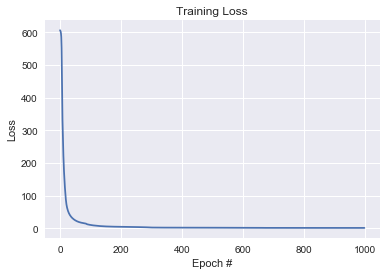

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.figure()
plt.plot(np.arange(0, 1000), nn.losses),
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.89      1.00      0.94        42
          2       1.00      1.00      1.00        43
          3       0.96      0.98      0.97        47
          4       0.98      0.96      0.97        49
          5       0.97      0.89      0.93        37
          6       0.98      1.00      0.99        47
          7       0.97      0.97      0.97        39
          8       0.98      0.95      0.96        55
          9       0.91      0.89      0.90        46

avg / total       0.97      0.96      0.96       450



Our classification report demonstrates that we are obtaining around 98% classification accuracy on our testing set but we are having some trouble classifying some digits with lower rates. Later we will improve on this with a CNN implementation.